In [9]:
import pickle
import numpy as np
import math as mt
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
from skimage import io
%matplotlib inline

X_train, y_train, X_train_skel_features = None, None, None
with open("train_info", "rb") as fin:
    data = pickle.load(fin)
    X_train, y_train, X_train_skel_features = data["data"], data["labels"], data["skel_features"]

X_test, y_test, X_test_skel_features = None, None, None
with open("test_info", "rb") as fin:
    data = pickle.load(fin)
    X_test, y_test, X_test_skel_features = data["data"], data["labels"], data["skel_features"]

In [35]:
def get_edges_deg_rad(skel_features):
    edges_x = []
    edges_y = []
    degs = set()
    rads = set()
    deg = []
    
    for i, d in enumerate(skel_features):
        if i % 4 == 0:
            edges_x.append(d)
        if i % 4 == 1:
            edges_y.append(d)
        if i % 4 == 2:
            degs.add((edges_x[-1], edges_y[-1], d))
            deg.append((edges_x[-1], edges_y[-1], d))
        if i % 4 == 3:
            rads.add((edges_x[-1], edges_y[-1], d))
    
    return edges_x, edges_y, list(degs), list(rads), deg

In [155]:
def draw_skeleton(image, features):
    res_x, res_y, res_deg, res_rad, _ = get_edges_deg_rad(features)
    
    fig = plt.figure(figsize=(18, 8))

    ax = fig.add_subplot(121)
    ax.imshow(image.reshape((s, s)), cmap="gray", interpolation="none")

    for i in range(0, len(res_x), 2):
        ax.plot(res_x[i:i + 2], np.array(res_y[i:i + 2]), color="black")

    for i in range(len(res_deg)):
        x, y, d = res_deg[i]
        ax.scatter([x], [s - y], color="blue", s=5)
        ax.text(x, y, str(int(d)), fontsize=16, color="red")

    ax = fig.add_subplot(122)

    ax.imshow(image.reshape((s, s)), cmap="gray", interpolation="none")

    for i in range(0, len(res_x), 2):
        ax.plot(res_x[i:i + 2], s - np.array(res_y[i:i + 2]), color="black")

    for i in range(len(res_rad)):
        x, y, r = res_deg[i]
        circle = plt.Circle((x, s - y), r, color="cyan", ls="-", linewidth=2, fill=False)
        ax.scatter([x], [s - y], color="blue", s=5)
        ax.add_patch(circle)

    fig.show()

In [156]:
s = int(np.sqrt(X_train.shape[1]))

**ВНИМАНИЕ! Здесь отрисовщик автоматически отражает картинку симметрично по оси Y**

/home/nekorobov/.local/lib/python3.5/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


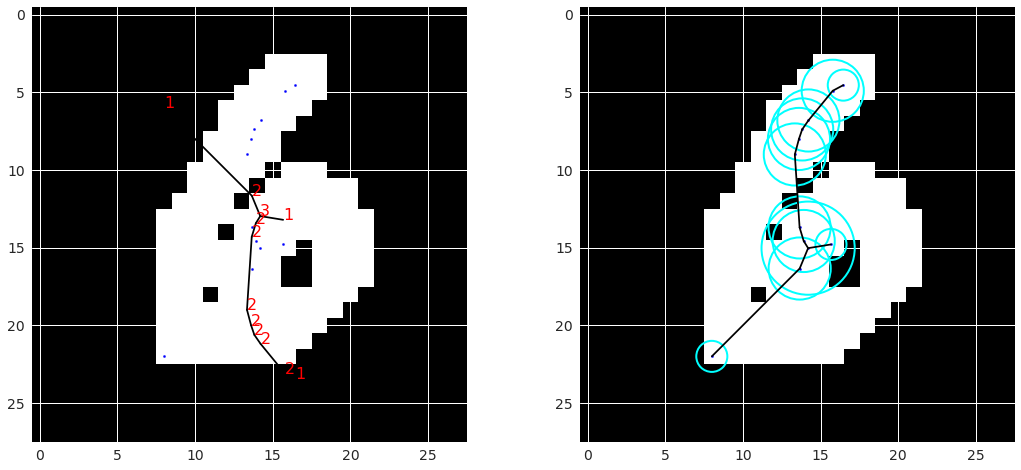

In [293]:
draw_skeleton(X_train[36027, :], X_train_skel_features[36027])

0


/home/nekorobov/.local/lib/python3.5/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/home/nekorobov/.local/lib/python3.5/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/home/nekorobov/.local/lib/python3.5/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


5923


/home/nekorobov/.local/lib/python3.5/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


12665


/home/nekorobov/.local/lib/python3.5/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/home/nekorobov/.local/lib/python3.5/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


18623


/home/nekorobov/.local/lib/python3.5/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/home/nekorobov/.local/lib/python3.5/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


24754


/home/nekorobov/.local/lib/python3.5/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/home/nekorobov/.local/lib/python3.5/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


30596


/home/nekorobov/.local/lib/python3.5/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/home/nekorobov/.local/lib/python3.5/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/home/nekorobov/.local/lib/python3.5/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


36017


/home/nekorobov/.local/lib/python3.5/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


41935


/home/nekorobov/.local/lib/python3.5/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/home/nekorobov/.local/lib/python3.5/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


48200


/home/nekorobov/.local/lib/python3.5/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/home/nekorobov/.local/lib/python3.5/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


54051


/home/nekorobov/.local/lib/python3.5/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/home/nekorobov/.local/lib/python3.5/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


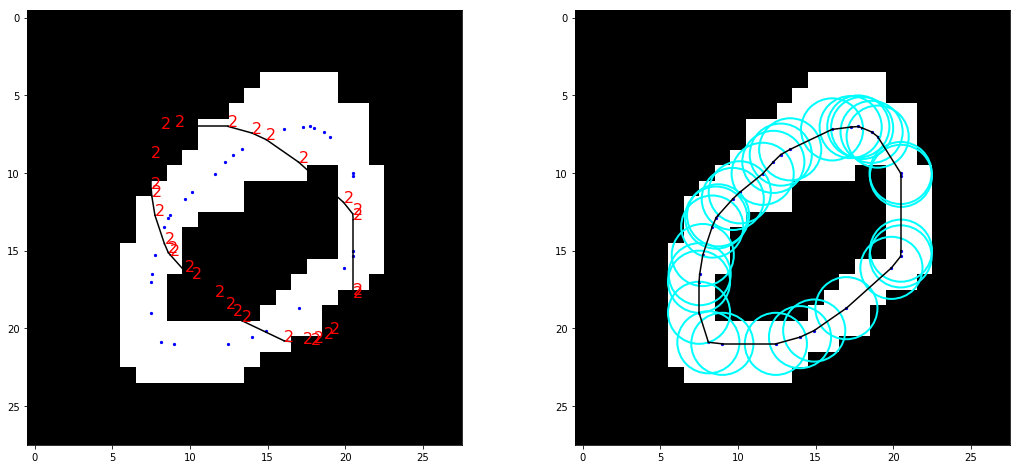

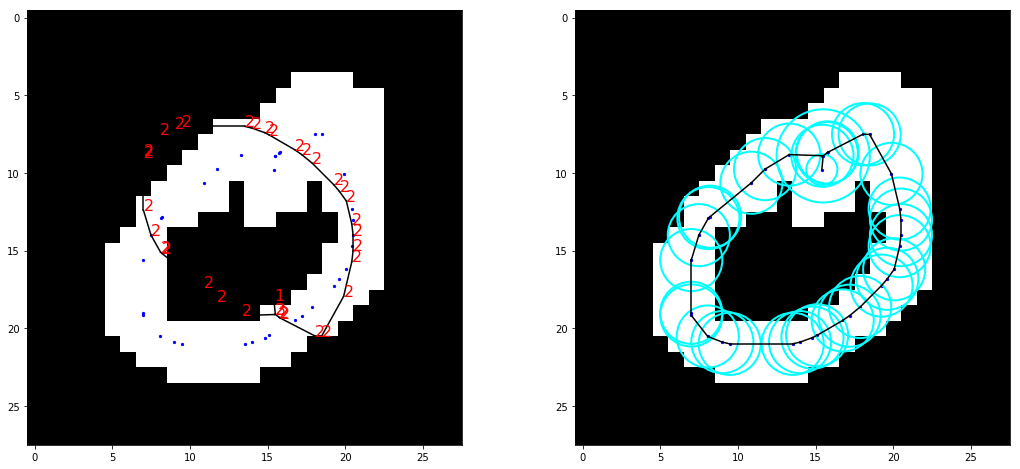

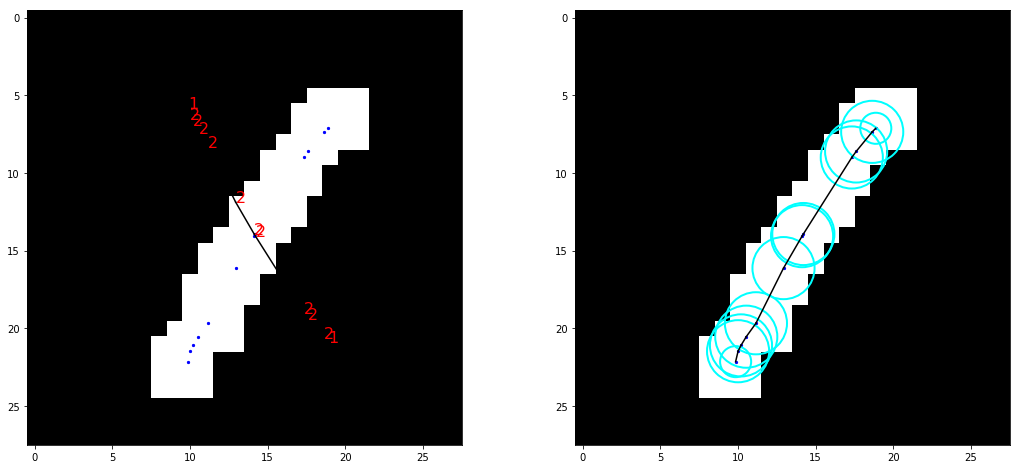

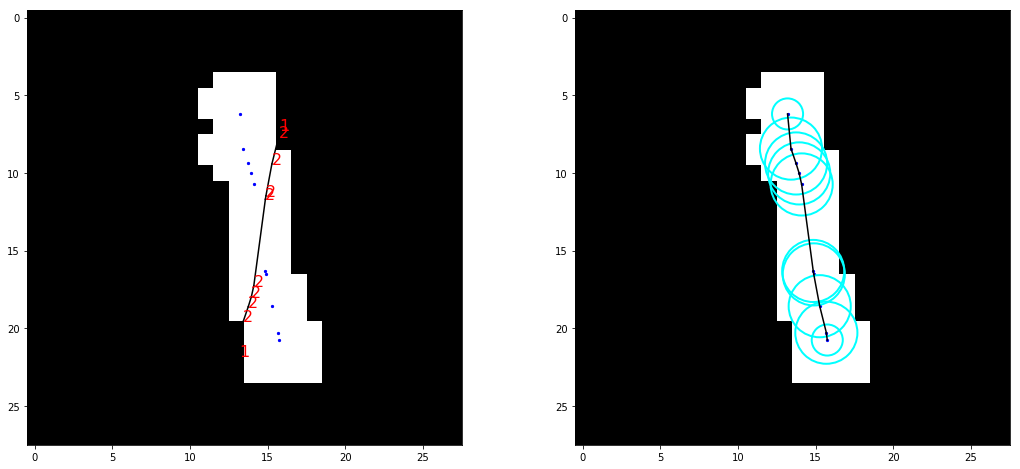

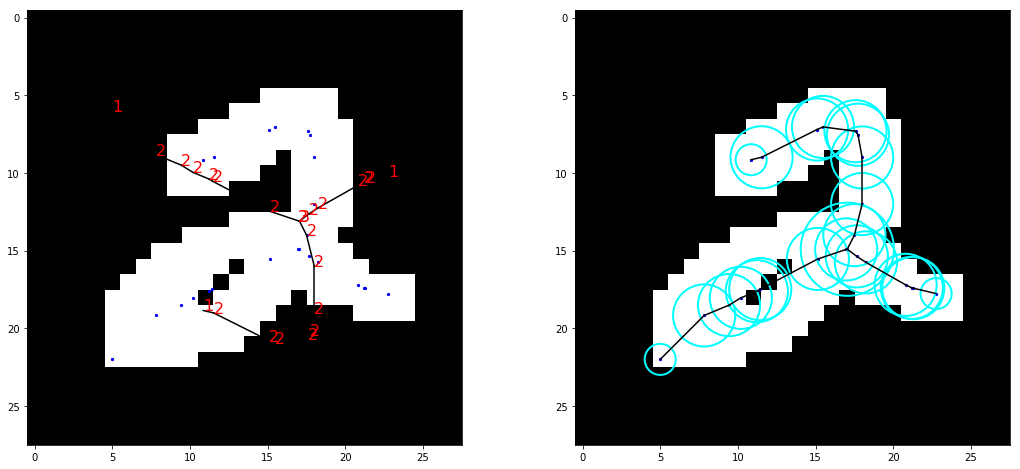

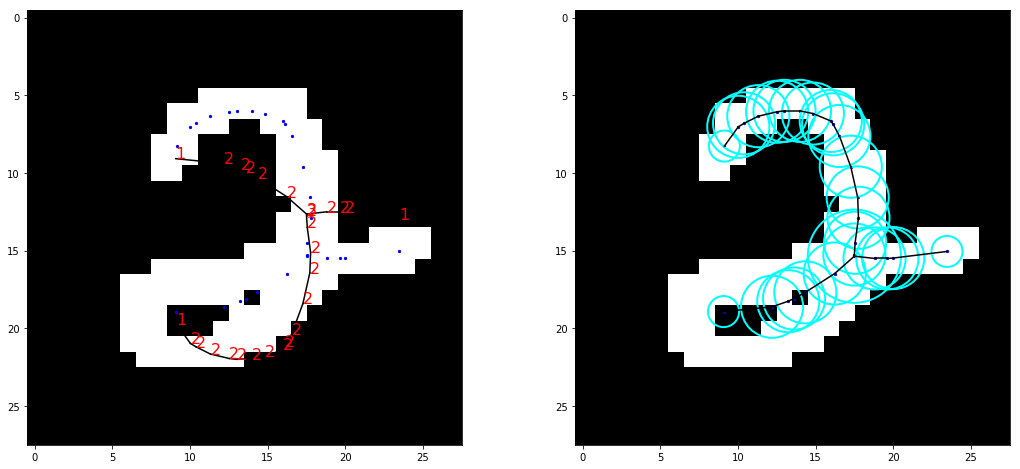

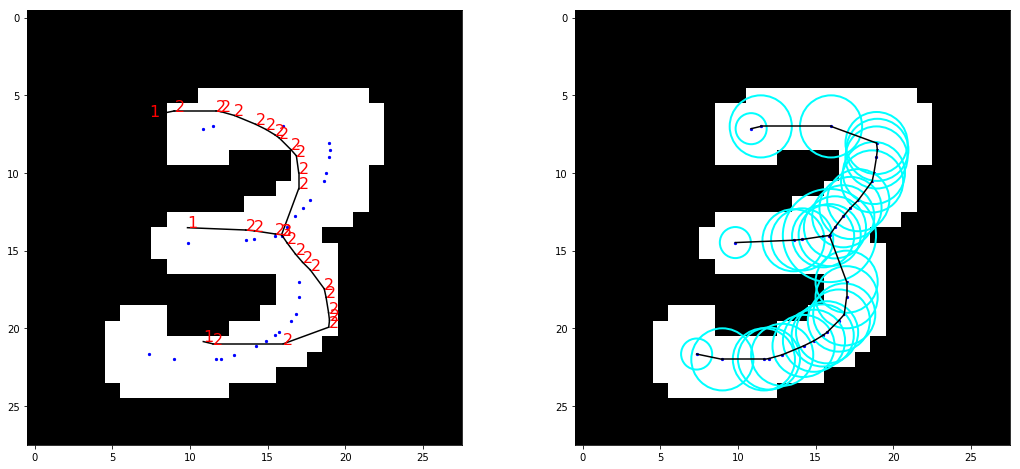

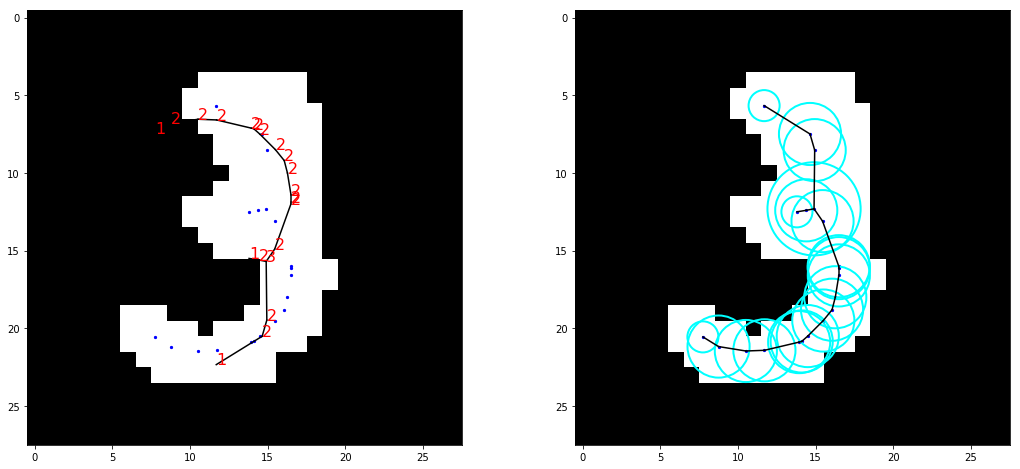

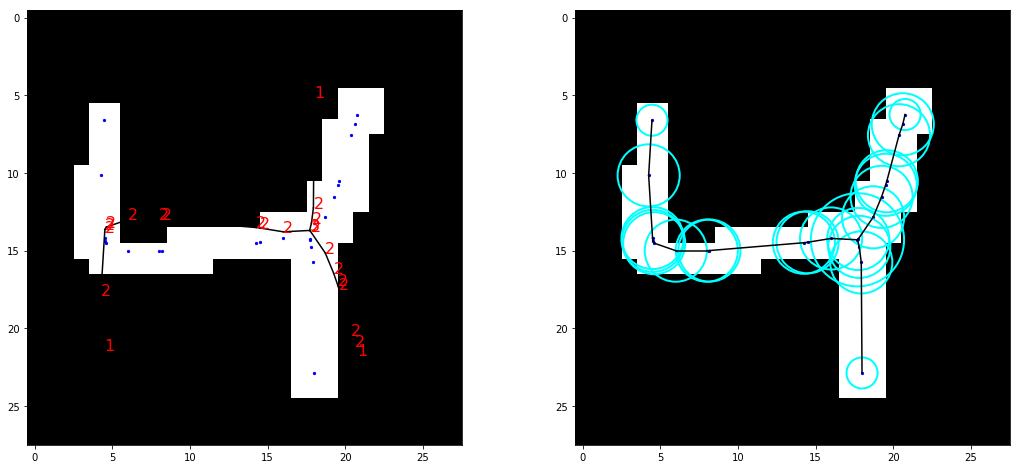

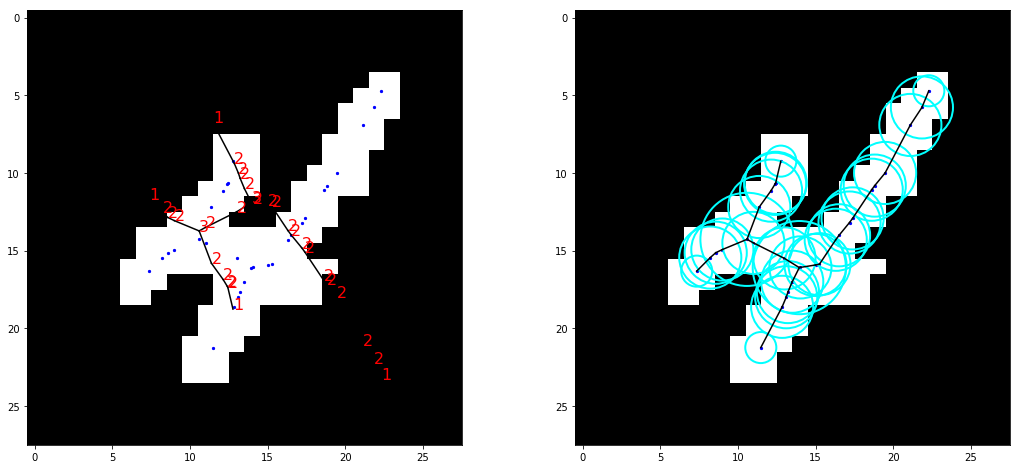

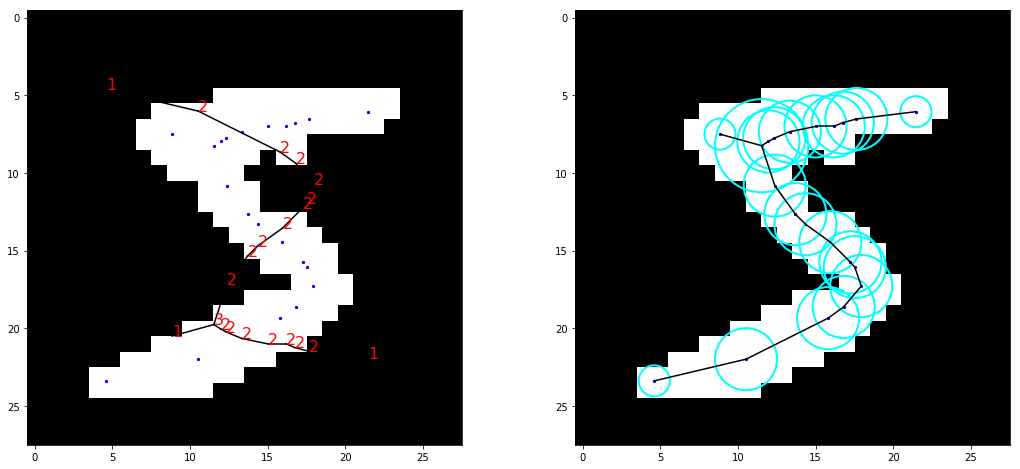

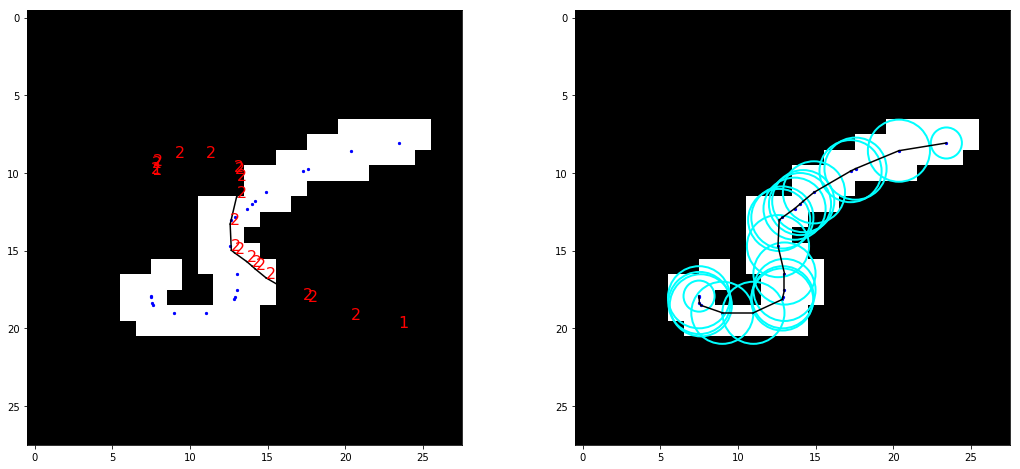

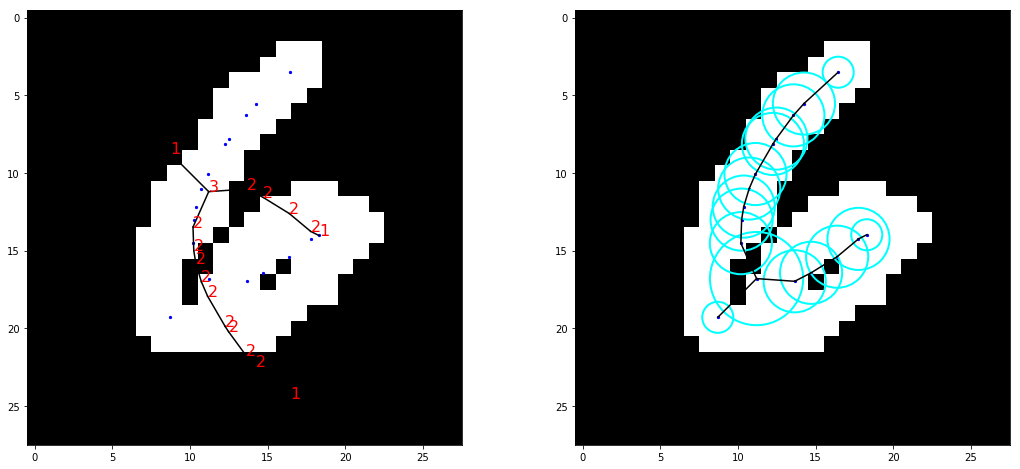

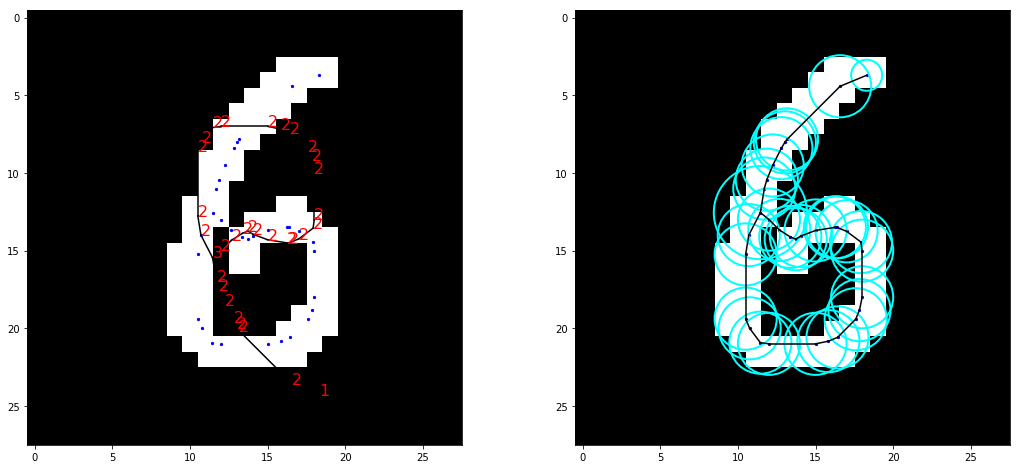

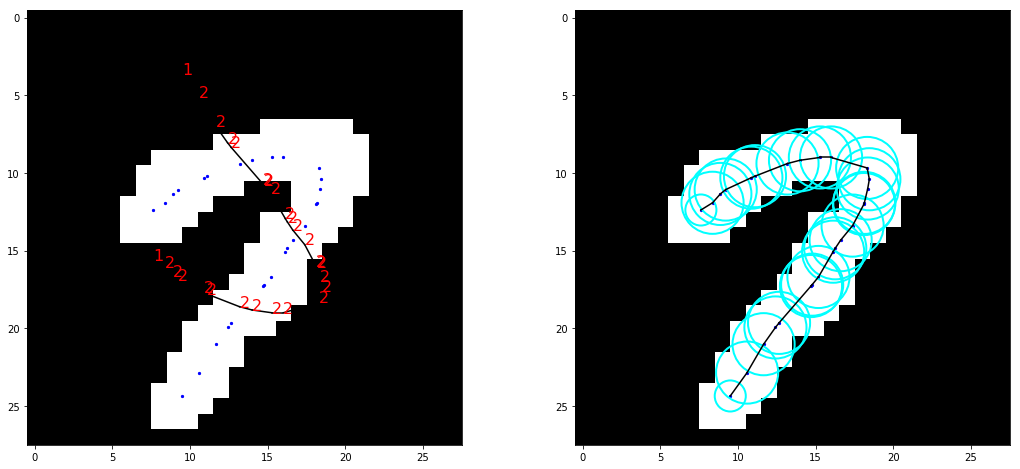

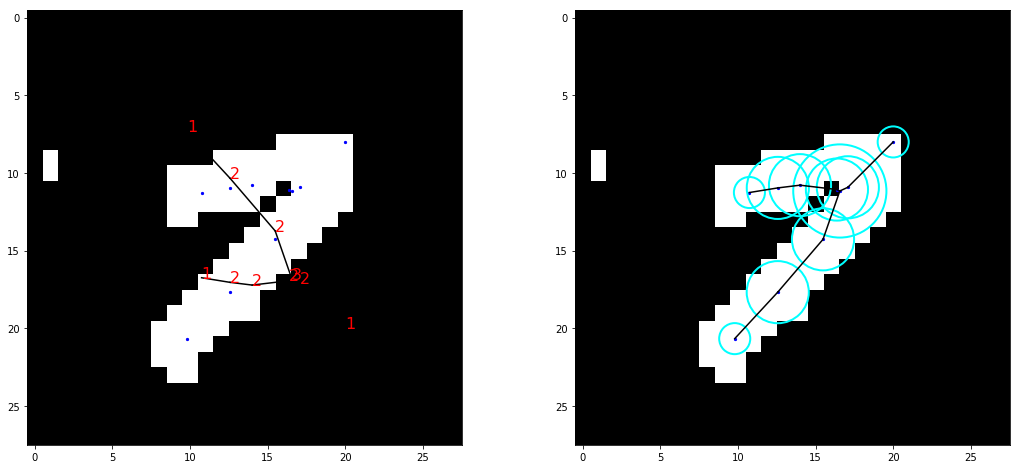

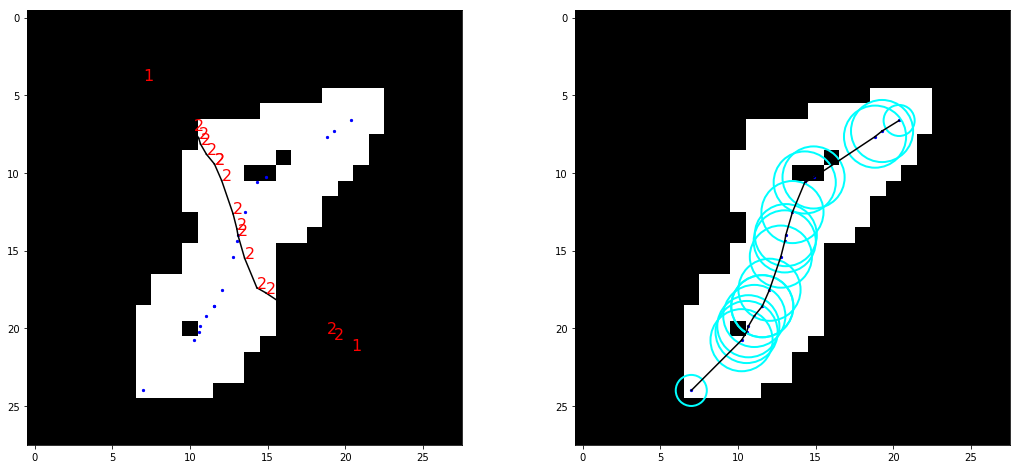

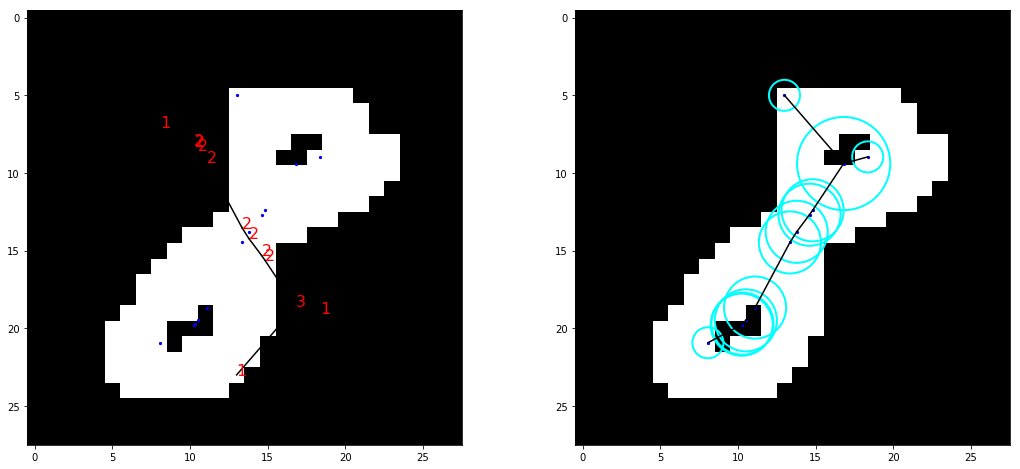

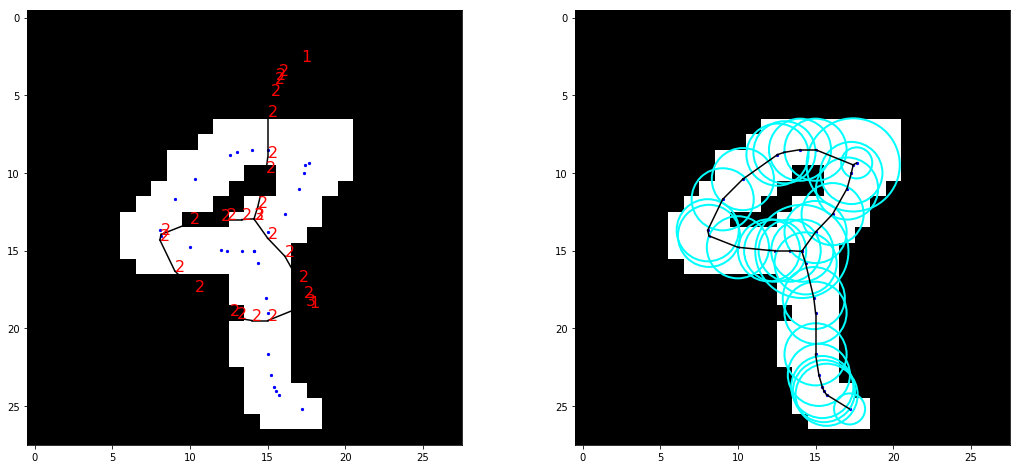

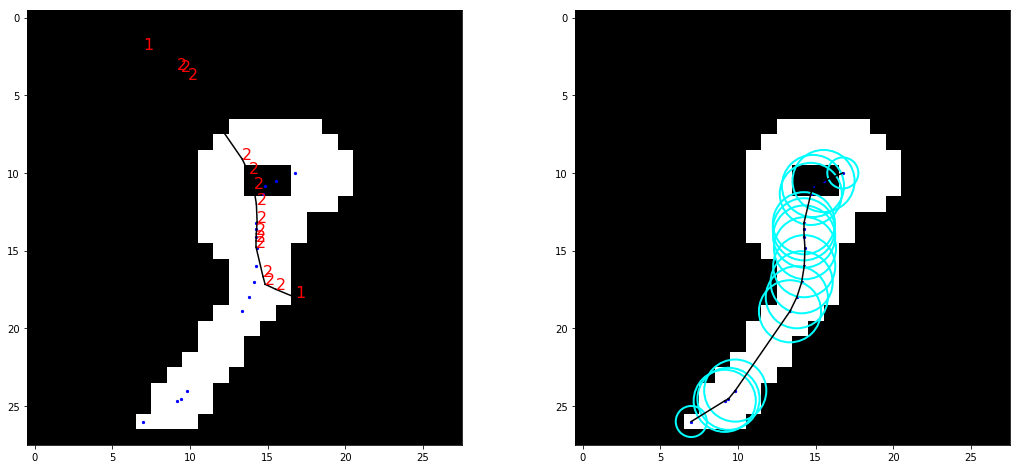

In [158]:
for i in range(10):
    idx1, idx2 = np.where(y_train == i)[0][:2]
    print(idx1)
    draw_skeleton(X_train[idx1, :], X_train_skel_features[idx1])
    draw_skeleton(X_train[idx2, :], X_train_skel_features[idx2])

In [192]:
class Point:
    def __init__(self, x, y, degree):
        self.x = x
        self.y = y
        self.degree = degree
        
    def __hash__(self):
        return hash((self.x, self.y, self.degree))
    
    def __eq__(self, other):
        return (self.x, self.y, self.degree) == (other.x, other.y, other.degree)
    
    def __ne__(self, other):
        return not(self == other)
    
    def distance(self, other):
        return mt.sqrt((self.x - other.x) ** 2 + (self.y - other.y) ** 2)
    
    def dump(self):
        print("({}; {}) with degree {}".format(self.x, self.y, self.degree))
        
    def __str__(self):
        return "(" + str(self.x) + "; " + str(self.y) + ") " + str(self.degree)
    
    def __repr__(self):
        return self.__str__()
    
    def angle(self, other):
        if cos_value > 1:
            cos_value = 1
        return mt.acos(cos_value)
   
    def norm(self):
        return mt.sqrt(self.x ** 2 + self.y ** 2)
    
    def eq(self, other):
        return (self.x, self.y) == (other.x, other.y)

In [253]:
class Skeleton:
    dist = 0
    angle = 0
    
    def __init__(self, features):
        self._threshold_angle = mt.pi / 4
        self._graph = self._build_graph(features)
        self._special_points = self._get_special_points()
        self._compute_features()
        
    def _build_graph(self, features):
        graph = {}
        _, _, _, _, deg = get_edges_deg_rad(features)
        
        max_x = 0
        max_y = 0
        for i in range(0, len(deg)):
            p1 = Point(*deg[i])
            if p1.x > max_x:
                max_x = p1.x
            if p1.y > max_y:
                max_y = p1.y

        for i in range(0, len(deg), 2):
            p1 = Point(*deg[i])
            p2 = Point(*deg[i+1])
            p1.x /= max_x
            p1.y /= max_y
            p2.x /= max_x
            p2.y /= max_y
            if p1 not in graph:
                graph[p1] = set()
            graph[p1].add(p2)
            if p2 not in graph:
                graph[p2] = set()
            graph[p2].add(p1)
                    
        return graph

    def _validate_graph(self, graph):
        for key, value in graph.items():
            if key.degree != len(value):
                key.dump()
                return False
        return True
    
    def _compute_features(self):
        self._compute_relative_len()
        self._compute_directions()
        self._compute_io_directions()
        self._compute_curvature()  
        self._compute_number_of_special_points()
        self._compute_number_of_points()
        self._compute_new_curvature()
        self._compute_average_dist()
        self._compute_angles(list(self._graph.keys())[0])
        self._compute_avg_loop()
        self._compute_degree()
        self._compute_loop_deviation()
        
    def _compute_number_of_special_points(self):
        self.number_of_special_points = len(self._get_special_points())
        
    def _get_sum_of_deviations(self, start, visited = None):
        if visited is None:
            visited = set()
        visited.add(start)
        for neighbour1 in self._graph[start]:
            for neighbour2 in self._graph[start]:
                if neighbour2 != neighbour1:
                    if neighbour1.distance(neighbour2) > 0:
                        self.new_curvature += ((start.x - (neighbour1.x + neighbour2.x) / 2) ** 2 + \
                                                (start.y - (neighbour1.y + neighbour2.y) / 2) ** 2) / \
                                                (neighbour1.distance(neighbour2))
        for next in self._graph[start] - visited:
            self._get_sum_of_deviations(next, visited)
        return visited
    
    def _compute_new_curvature(self):
        self.new_curvature = 0
        self._get_sum_of_deviations(list(self._graph.keys())[0])
        self.new_curvature /= self.number_of_points
        
    def _compute_average_dist(self):
        self.average_dist = self.dist / self.number_of_points
        
    def _compute_relative_len(self):
        self._get_graph_len()
        if len(self._special_points) < 2:
            self.relative_dist = [0, 0, 0]
            return
        
        dist = []
        for i in range(len(self._special_points)-1):
            d = 0
            path = list(self._bfs_paths(self._special_points[i], self._special_points[i+1]))
            if not len(path):
                continue
            path = path[0]
            for k in range(len(path)-1):
                d += path[k].distance(path[k+1])
            dist.append(d / self.dist)
        
        if len(dist) == 0:
            self.relative_dist = [0, 0, 0]
            return
        
        arr = np.array(dist)
        self.relative_dist = [np.max(arr), np.min(arr), np.mean(arr)]
       
    def _get_graph_len(self):
        self.dist = 0
        i = 0
        while self.dist == 0:
            self._dfs_full_len(list(self._graph.keys())[i])
            i += 1
        
    def _compute_directions(self):
        dirx = []
        diry = []
        dist_arr = []
        dir = []
        if len(self._special_points) < 2:
            self.directions_f = [0, 0, 0, 0, 0, 0, 0, 0, 0]
            return
        
        for i in range(len(self._special_points)-1):
            dist = self._special_points[i].distance(self._special_points[i+1])
            dx = self._special_points[i+1].x - self._special_points[i].x
            dy = self._special_points[i+1].y - self._special_points[i].y
            dirx.append(dx)
            diry.append(dy)
            dist_arr.append(dist)
            dir.append((dx, dy, dist))
        
        self._directions = dir
        self.directions_f = [np.min(np.array(dirx)), np.max(np.array(dirx)), 
                             np.mean(np.array(dirx)), np.min(np.array(diry)), 
                             np.max(np.array(diry)), np.mean(np.array(diry)), 
                             np.min(np.array(dist_arr)), np.max(np.array(dist_arr)),
                             np.mean(np.array(dist_arr))]
        

    def _compute_io_directions(self):
        odirx = []
        odiry = []
        odirdist = []
        idirx = []
        idiry = []
        idirdist = []
        if len(self._special_points) < 2:
            self.io_directions = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
            return
        
        for i in range(len(self._special_points)):
            for v in self._graph[self._special_points[i]]:
                dist = v.distance(self._special_points[i])
                dx = v.x - self._special_points[i].x
                dy = v.y - self._special_points[i].y
                odirx.append(dx)
                odiry.append(dy)
                odirdist.append(dist)
            for key, value in self._graph.items():
                if self._special_points[i] in value:
                    dist = key.distance(self._special_points[i])
                    dx = key.x - self._special_points[i].x
                    dy = key.y - self._special_points[i].y
                    idirx.append(dx)
                    idiry.append(dy)
                    idirdist.append(dist)
        self.io_directions = [np.min(np.array(idirx)), np.max(np.array(idirx)), 
                              np.mean(np.array(idirx)), np.min(np.array(odirx)), 
                              np.max(np.array(odirx)), np.mean(np.array(odirx)), 
                              np.min(np.array(idiry)), np.max(np.array(idiry)), 
                              np.mean(np.array(idiry)), np.min(np.array(odiry)), 
                              np.max(np.array(odiry)), np.mean(np.array(odiry)), 
                              np.min(np.array(idirdist)), np.max(np.array(idirdist)), 
                              np.mean(np.array(idirdist)), np.min(np.array(odirdist)), 
                              np.max(np.array(odirdist)), np.mean(np.array(odirdist))]
        
    def _compute_number_of_points(self):
        self.number_of_points = len(list(self._graph.keys()))
    
    def _compute_curvature(self):
        curvature = []
        if len(self._special_points) < 2:
            self.curvature = [0, 0, 0]
            return
        
        for i in range(len(self._special_points)-1):
            d = 0
            path = list(self._bfs_paths(self._special_points[i], self._special_points[i+1]))
            dx, dy, dist = self._directions[i]
            for p in path:
                max_dist = 0
                for k in range(len(p)):
                    d = mt.fabs(dy * p[k].x - dx * p[k].y + self._special_points[i].y * self._special_points[i+1].x - self._special_points[i+1].y * self._special_points[i].x)
                    d /= dist
                    if d > max_dist:
                        max_dist = d
                curvature.append(max_dist / dist)
        if len(curvature) == 0:
            self.curvature = [0, 0, 0]
            return
        self.curvature = [np.min(np.array(curvature)), np.max(np.array(curvature)), np.mean(np.array(curvature))]
                    
    def _dfs_full_len(self, start, visited=None):
        if visited is None:
            visited = set()
        visited.add(start)
        for next in self._graph[start] - visited:
            self._dfs_full_len(next, visited)
            self.dist += next.distance(start)
        return visited
    
    def _bfs_paths(self, start, goal):
        queue = [(start, [start])]
        while queue:
            (vertex, path) = queue.pop(0)
            for next in self._graph[vertex] - set(path):
                if next == goal:
                    yield path + [next]
                else:
                    queue.append((next, path + [next]))
    
    def _get_special_points(self):
        points = []
        for key, value in self._graph.items():
            if key.degree == 1 or key.degree == 3:
                if len(value) > 0:
                    points.append(key)
                
        points.sort(key=lambda x: x.x, reverse=True)
        return points
    
    def _compute_angles(self, start, visited=None):
        if visited is None:
            visited = set()
        visited.add(start)
        for next in self._graph[start] - visited:
            v = visited
            v.add(start)
            v.add(next)
            prev = list(self._graph[next] - v)
            if len(prev) > 0:
                prev = prev[0]
            else:
                continue

            if prev.degree == 1:
                continue
            if not prev.eq(next) and not start.eq(next):
                cos_value = mt.fabs(((start.x - next.x) * (next.x - prev.x) + 
                        (start.y - next.y) * (next.y - prev.y)) /
                        (mt.sqrt((next.x - start.x)**2 + (next.y - start.y)**2) *
                         mt.sqrt((prev.x - next.x)**2 + (prev.y - next.y)**2)))
            else:
                cos_value = 1
            self._compute_angles(next, visited)
            if cos_value > 1:
                cos_value = 1
            angle = mt.acos(cos_value)
            if angle > self._threshold_angle:
                self.angle += angle
                
    def _paths(self, start, goal):
        queue = [(start, [])]
        answer = []
        while queue:
            (vertex, path) = queue.pop(0)
            for next in self._graph[vertex] - set(path):
                if next == goal:
                    answer.append(path + [next])
                else:
                    queue.append((next, path + [next]))
        return answer
                
    def _compute_avg_loop(self):
        special_points = self._get_special_points()
        a = []
        s = 0
        for point in special_points:
            a = self._paths(point, point)
        for i in range(len(a)):
            for j in range(len(a[i])):
                if j == len(a[i]) - 1:
                    s += a[i][j].distance(a[i][0])
                else:
                    s += a[i][j].distance(a[i][j + 1])
        if len(a) == 0:
            self.avg_loop = 0
        else:
            self.avg_loop = s / len(a)
    
    def _compute_degree(self):
        special_points = self._get_special_points()
        self.degree_1 = 0
        self.degree_2 = 0
        self.degree_3 = 0
        self.degree_4 = 0
        for point in special_points:
            if point.degree == 1:
                self.degree_1 += 1
            if point.degree == 2:
                self.degree_2 += 1
            if point.degree == 3:
                self.degree_3 += 1
            if point.degree == 4:
                self.degree_4 += 1
                
    def _compute_loop_deviation(self):
        self.loop_deviation = 0
        paths = []
        for point in self._special_points:
            paths = self._paths(point, point)
        if len(paths) == 0:
            return
        for path in paths:
            for p in path:
                self.loop_deviation += p.y - 0.5

In [292]:
Skeleton(X_train_skel_features[36027]).loop_deviation

-0.2475160687360909

In [254]:
def create_dataset_skeletons(X):
    df = pd.DataFrame(columns=["rdistmin", "rdistmax", "rdistavg", "dxmin", "dxmax", "dxavg", "dymin", "dymax", "dyavg",
                               "ddmin", "ddmax", "ddavg", "scurvmin", "scurvmax", "scurvavg", "dixmin", "dixmax", "dixavg",
                               "diymin", "diymax", "diyavg", "didmin", "didmax", "didavg", "doxmin", "doxmax", "doxavg",
                               "doymin", "doymax", "doyavg", "dodmin", "dodmax", "dodavg", "nspec", "n", "curv", "d", "dist",
                               "angle", "deg1", "deg2", "deg3", "deg4", "avg_loop", "loop_deviation"])
    for i, skeleton in tqdm_notebook(enumerate(X)):
        sk = Skeleton(skeleton)
        if sk.relative_dist[0] > 1.0:
            sk.relative_dist[0] = 1.0
        if sk.relative_dist[1] > 1.0:
            sk.relative_dist[1] = 1.0
        if sk.relative_dist[2] > 1.0:
            sk.relative_dist[2] = 1.0
        df.loc[i] = [*sk.relative_dist, *sk.directions_f, *sk.curvature, *sk.io_directions, sk.number_of_special_points, 
                     sk.number_of_points, sk.new_curvature, sk.average_dist, sk.dist, sk.angle, sk.degree_1, sk.degree_2,
                     sk.degree_3, sk.degree_4, sk.avg_loop, sk.loop_deviation]
    return df

In [255]:
df = create_dataset_skeletons(X_train_skel_features)
df.to_csv('train_skeleton_features.csv')
df = create_dataset_skeletons(X_test_skel_features)
df.to_csv('test_skeleton_features.csv')

# Machine Learning

In [8]:
import pandas as pd
import numpy as np
import math as mt
from tqdm import tqdm_notebook
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Imputer
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from scipy.stats import expon
import matplotlib.pyplot as plt
from skimage import io
from sklearn.metrics import f1_score
import xgboost
%matplotlib inline

In [2]:
df_train = pd.read_csv('train_skeleton_features.csv')
df_train = df_train.drop(df_train.columns[0], axis=1)
df_test = pd.read_csv('test_skeleton_features.csv')
df_test = df_test.drop(df_test.columns[0], axis=1)

In [14]:
model = ExtraTreesClassifier()
model.fit(df_train, y_train)
for i, c in enumerate(df_train.columns):
    print(c + ": " + str(model.feature_importances_[i]))

rdistmin: 0.05774744111429016
rdistmax: 0.02679354010102495
rdistavg: 0.03288101885989882
dxmin: 0.02631069876258198
dxmax: 0.019702467273827247
dxavg: 0.026144166605549524
dymin: 0.03452762726747101
dymax: 0.05096269636127937
dyavg: 0.05114333546481416
ddmin: 0.027287153920357927
ddmax: 0.03297599402367303
ddavg: 0.03608382091966687
scurvmin: 0.03039659157267282
scurvmax: 0.027576752190671783
scurvavg: 0.026744917961461945
dixmin: 0.013977959205625242
dixmax: 0.01886386226870727
dixavg: 0.027105168583689398
diymin: 0.024234381399129777
diymax: 0.018135484638176734
diyavg: 0.01937880017121351
didmin: 0.015853902731739027
didmax: 0.013495621547923473
didavg: 0.014737618790982815
doxmin: 0.020441260729775992
doxmax: 0.01888426034630085
doxavg: 0.013385401801798941
doymin: 0.005877237953860998
doymax: 0.009230497808961884
doyavg: 0.008873844574576852
dodmin: 0.005928757715852593
dodmax: 0.006495091973094484
dodavg: 0.006822651639776402
nspec: 0.025346283238204807
n: 0.03366979327620176
cu

# VISUALISE DATA

In [4]:
color = ['red', 'black', 'blue', 'green', 'grey', 'purple', 'brown', 'yellow', 'pink', 'orange']
def draw_ff_plot(X, f1, f2):
    print(f1, f2)
    plt.figure(figsize=(10, 10))
    prev = 0
    c = 0
    for i in range(10):
        XX = X[X["label"] == i]
        plt.scatter(XX[f1], XX[f2],  marker='x', color=color[i])
    plt.xlabel(f1)
    plt.ylabel(f2)
    plt.show()

In [ ]:
X = pd.DataFrame(df_train).copy()
X["label"] = pd.Series(y_train)
for i in range(1, len(X.columns)):
    if(i + 1 < len(X.columns)):
        for j in range(i+1, len(X.columns)):
            draw_ff_plot(X, X.columns[i], X.columns[j])

/home/nekorobov/.local/lib/python3.5/site-packages/numpy/lib/function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/nekorobov/.local/lib/python3.5/site-packages/numpy/lib/function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


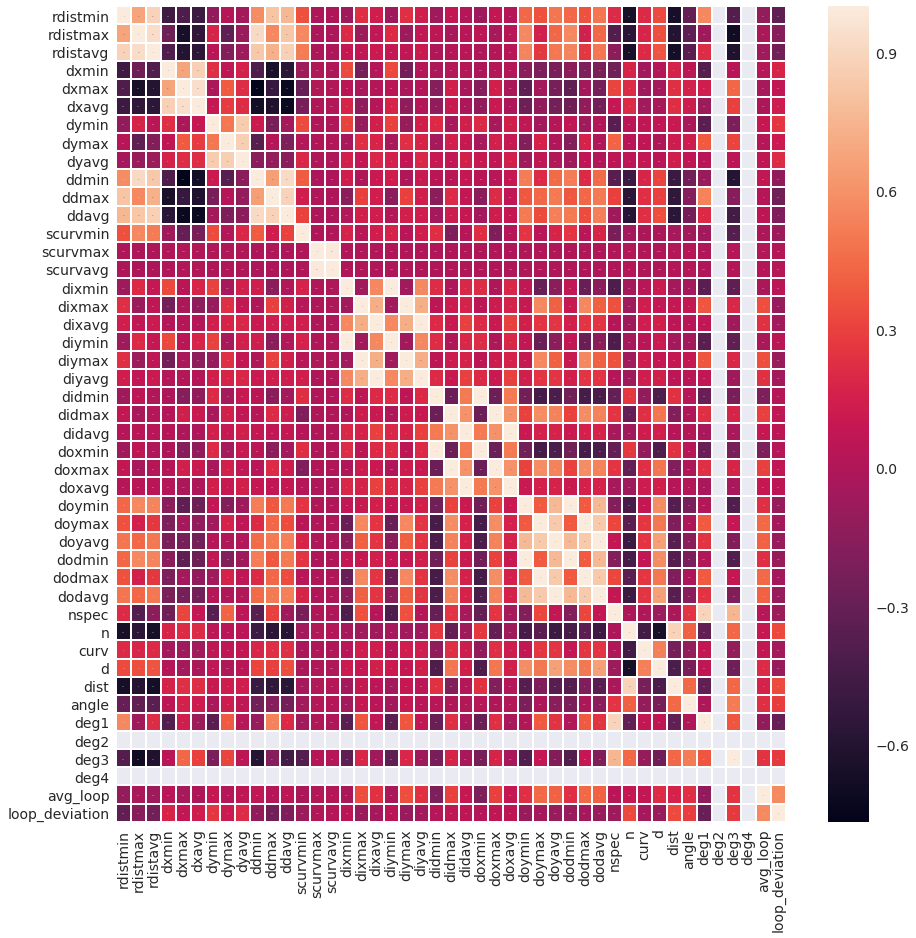

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 15)
sns.set(font_scale=1.4)
XXX = pd.DataFrame(df_train)
plot = sns.heatmap(np.corrcoef(XXX.T), annot=True, linewidths=1, xticklabels=XXX.columns, yticklabels=XXX.columns, annot_kws={"size": 0})
plot.figure.savefig('covmat.png')

# TRAIN

In [311]:
def preprocess_test(X, scaler, pca):
    XX = pd.DataFrame()
    for index, row in tqdm_notebook(X.iterrows()):
        r = pd.DataFrame(scaler.transform(np.float32(row.to_frame().T)), columns=X.columns)
        r = pca.transform(r)
        XX = XX.append(pd.DataFrame(r))
    return XX

def preprocess_train(X, alpha=0.999, n=30):
    scaler = StandardScaler()
    XX = pd.DataFrame(scaler.fit_transform(np.float32(X)), columns=X.columns)
    '''for i in range(1, len(XX.columns)):
        pca = PCA(n_components=i)
        XPCAreduced = pca.fit_transform(XX)
        print(np.sum(np.array(pca.explained_variance_ratio_)))
        if np.sum(np.array(pca.explained_variance_ratio_)) > alpha:
            n = i
            break
    '''
    pca = PCA(n_components=n)
    XX = pca.fit_transform(XX)
    return XX, pca, scaler

In [312]:
XX_train, pca, scaler = preprocess_train(df_train, n=31)
#XX_train = df_train.copy()

In [313]:
XX_test = preprocess_test(df_test, scaler, pca)
#XX_test = df_test.copy()

In [305]:
def fit(X, Y):
    params = {
        'C': expon(),
        'kernel': ['rbf'],
        'degree': np.arange(1, 5)
    }
    rs = RandomizedSearchCV(SVC(), params, n_iter=30, n_jobs=1, verbose=10)
    rs.fit(X, Y)
    return rs

In [306]:
rs = fit(XX_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] kernel=rbf, degree=1, C=1.0027521390543868 ......................
[CV]  kernel=rbf, degree=1, C=1.0027521390543868, score=0.8900719856028795, total=  52.8s
[CV] kernel=rbf, degree=1, C=1.0027521390543868 ......................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.6min remaining:    0.0s


[CV]  kernel=rbf, degree=1, C=1.0027521390543868, score=0.8952447622381119, total=  52.6s
[CV] kernel=rbf, degree=1, C=1.0027521390543868 ......................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.2min remaining:    0.0s


[CV]  kernel=rbf, degree=1, C=1.0027521390543868, score=0.8940841126168926, total=  52.6s
[CV] kernel=rbf, degree=2, C=0.20795450426815382 .....................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  4.9min remaining:    0.0s


[CV]  kernel=rbf, degree=2, C=0.20795450426815382, score=0.8663267346530694, total= 1.1min
[CV] kernel=rbf, degree=2, C=0.20795450426815382 .....................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  7.0min remaining:    0.0s


[CV]  kernel=rbf, degree=2, C=0.20795450426815382, score=0.8659432971648583, total= 1.1min
[CV] kernel=rbf, degree=2, C=0.20795450426815382 .....................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  9.0min remaining:    0.0s


[CV]  kernel=rbf, degree=2, C=0.20795450426815382, score=0.868430264539681, total= 1.1min
[CV] kernel=rbf, degree=4, C=0.24935209069285968 .....................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 11.1min remaining:    0.0s


[CV]  kernel=rbf, degree=4, C=0.24935209069285968, score=0.8698260347930414, total= 1.1min
[CV] kernel=rbf, degree=4, C=0.24935209069285968 .....................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 13.1min remaining:    0.0s


[CV]  kernel=rbf, degree=4, C=0.24935209069285968, score=0.8699934996749837, total= 1.1min
[CV] kernel=rbf, degree=4, C=0.24935209069285968 .....................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 15.2min remaining:    0.0s


[CV]  kernel=rbf, degree=4, C=0.24935209069285968, score=0.8724308646296944, total= 1.1min
[CV] kernel=rbf, degree=1, C=0.17203437643791694 .....................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 17.2min remaining:    0.0s


[CV]  kernel=rbf, degree=1, C=0.17203437643791694, score=0.8627274545090982, total= 1.2min
[CV] kernel=rbf, degree=1, C=0.17203437643791694 .....................
[CV]  kernel=rbf, degree=1, C=0.17203437643791694, score=0.8624931246562328, total= 1.2min
[CV] kernel=rbf, degree=1, C=0.17203437643791694 .....................
[CV]  kernel=rbf, degree=1, C=0.17203437643791694, score=0.864579686953043, total= 1.2min
[CV] kernel=rbf, degree=4, C=0.033710919280181176 ....................
[CV]  kernel=rbf, degree=4, C=0.033710919280181176, score=0.824135172965407, total= 1.8min
[CV] kernel=rbf, degree=4, C=0.033710919280181176 ....................
[CV]  kernel=rbf, degree=4, C=0.033710919280181176, score=0.8232911645582279, total= 1.8min
[CV] kernel=rbf, degree=4, C=0.033710919280181176 ....................
[CV]  kernel=rbf, degree=4, C=0.033710919280181176, score=0.8284242636395459, total= 1.8min
[CV] kernel=rbf, degree=4, C=0.6240080504200142 ......................
[CV]  kernel=rbf, degree=4,

[CV]  kernel=rbf, degree=4, C=0.9557664825076917, score=0.889872025594881, total=  51.8s
[CV] kernel=rbf, degree=4, C=0.9557664825076917 ......................
[CV]  kernel=rbf, degree=4, C=0.9557664825076917, score=0.8947947397369869, total=  52.3s
[CV] kernel=rbf, degree=4, C=0.9557664825076917 ......................
[CV]  kernel=rbf, degree=4, C=0.9557664825076917, score=0.893334000100015, total=  52.7s
[CV] kernel=rbf, degree=4, C=0.20427866627950345 .....................
[CV]  kernel=rbf, degree=4, C=0.20427866627950345, score=0.8659268146370726, total= 1.1min
[CV] kernel=rbf, degree=4, C=0.20427866627950345 .....................
[CV]  kernel=rbf, degree=4, C=0.20427866627950345, score=0.8656932846642332, total= 1.1min
[CV] kernel=rbf, degree=4, C=0.20427866627950345 .....................
[CV]  kernel=rbf, degree=4, C=0.20427866627950345, score=0.8679801970295544, total= 1.2min
[CV] kernel=rbf, degree=2, C=1.4160946188967882 ......................
[CV]  kernel=rbf, degree=2, C=1.4

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed: 185.7min finished


In [307]:
rc
#pickle.dump(model, open(filename, 'wb'))

NameError: name 'rc' is not defined

In [34]:
print(XX_train)

[[-0.26940649  0.45777654 -0.10990605 ... -0.03810113 -0.01220529
  -0.02566561]
 [-0.22135526  0.44731623 -0.20513901 ...  0.04222526 -0.00821005
  -0.00862905]
 [-0.25697653  0.45453936 -0.21760074 ... -0.0594051   0.01076357
   0.00349716]
 ...
 [-0.03893878 -0.52392976 -0.02803022 ...  0.01341985 -0.02245172
  -0.04857299]
 [-0.05885253 -0.51921057  0.133415   ...  0.03977702 -0.03280465
  -0.05141605]
 [-0.04403657 -0.52318091 -0.00313425 ...  0.00899399  0.01208832
   0.01332861]]


In [315]:
svc = SVC(C=5.487492778626242, kernel='rbf', degree=1)
svc.fit(XX_train, y_train)
svc.score(XX_test, y_test)
svc


SVC(C=5.487492778626242, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [317]:
pickle.dump(svc, open('svc_915.sav', 'wb'))

In [322]:
f1_score(y_test, svc.predict(XX_test), average='')

0.9145381557649953

In [279]:
for j in range(32, 34):
    XX_train, pca, scaler = preprocess_train(df_train, n=j)
    XX_test = preprocess_test(df_test, scaler, pca)
    w = []
    for i in range(6, 7, 1):
        neigh = KNeighborsClassifier(n_neighbors=i)
        neigh.fit(XX_train, y_train)
        #w.append(neigh.score(XX_test, y_test))
        print(neigh.score(XX_test, y_test), i)
    #print(j, max(w)) #k 31 n 5 87.32

0.8723 6


KeyboardInterrupt: 

In [298]:
xgb = xgboost.XGBClassifier()
xgb.fit(pd.DataFrame(XX_train), y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [299]:
xgb.score(XX_test, y_test)

/home/nekorobov/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8382

In [114]:
frst = RandomForestClassifier(n_estimators=10, random_state=0)
frst.fit(XX_train, y_train)

KeyboardInterrupt: 

In [113]:
frst.score(XX_test, y_test)

0.4805

In [296]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(XX_train, y_train)
neigh.score(XX_test, y_test)

0.8732

In [297]:
f1_score(y_test, neigh.predict(XX_test), average=None)

array([0.96572581, 0.9306678 , 0.83856298, 0.87389163, 0.88823529,
       0.87990762, 0.86748216, 0.85714286, 0.78615299, 0.82710779])